In [1]:
import matplotlib.pyplot as plt
from datasets.mathprim.marked_integer_dataset import MixedSprites3Dataset

from datasets.baseprim.shape3 import Shapes3Dataset

train_dataset = MixedSprites3Dataset(dataset_size=1024 // 1)  # create a dataset with 1024 samples
test_dataset = MixedSprites3Dataset(dataset_size=128)  # create a dataset with 128 samples for testing

#train_dataset = Shapes3Dataset(dataset_size = 1024)
#test_dataset = Shapes3Dataset(dataset_size = 128)

corpus = [data[1]["query"] for data in train_dataset]

#from data.collect_corpus import write_vocab, load_corpus, build_vocab
#vocab = build_vocab([] + corpus)
##write_vocab(vocab)


In [2]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/prototype")
### load the meta learner from the pretrained-checkpoint
pass


14 08:20:01 WRN The input domain is empty, creating an empty domain
14 08:20:01 WRN The input domain is empty, creating an empty domain
14 08:20:01 Function one automatically registered.
14 08:20:01 Function two automatically registered.
14 08:20:01 Function three automatically registered.
14 08:20:01 Function plus automatically registered.
14 08:20:01 Function avg automatically registered.
14 08:20:01 Function smaller automatically registered.
14 08:20:01 Function bigger automatically registered.
14 08:20:01 Function N automatically registered.
14 08:20:01 Function Z automatically registered.
14 08:20:01 Function subset automatically registered.
14 08:20:01 Function exists automatically registered.
14 08:20:01 Function forall automatically registered.
14 08:20:01 Function iota automatically registered.
14 08:20:01 Function negate automatically registered.
14 08:20:01 Function logic_and automatically registered.
14 08:20:01 Function logic_or automatically registered.
14 08:20:01 Functi

# Base Knowledge Learning


14 08:20:02 Filter dataset None: #before=1024, #after=1024.
14 08:20:02 Filter dataset None: #before=128, #after=128.


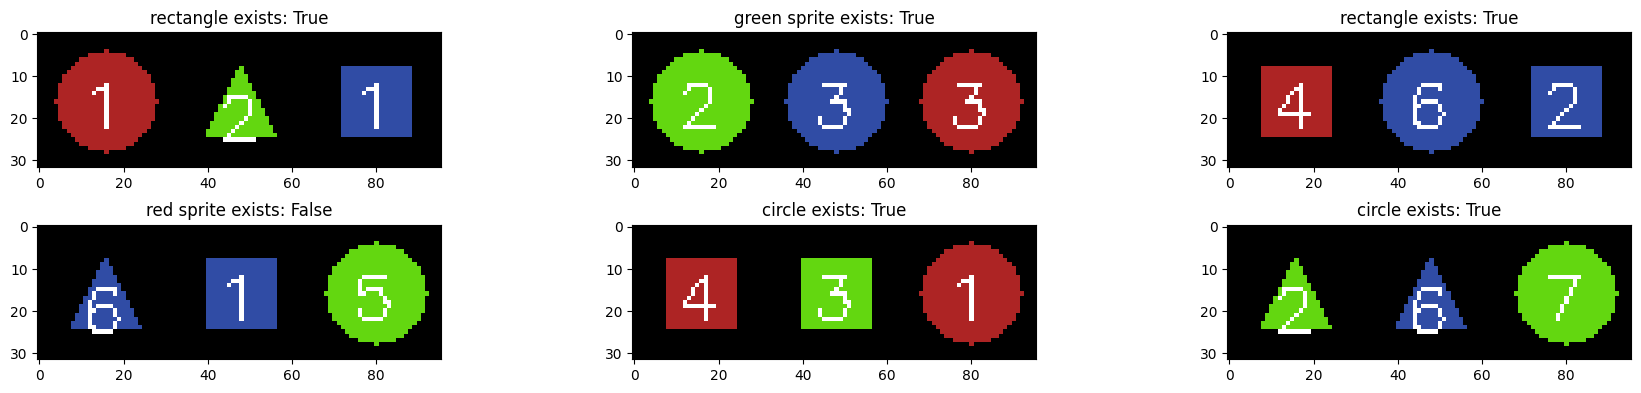

14 08:20:02 start to learn the words ['rectangle', 'triangle', 'exists', 'sprite', 'circle', 'red', 'green', 'blue'], add corpus size 1024
Training epochs: 100%|██████████| 10/10 [00:34<00:00,  3.41s/epoch, avg_loss=0.0000, avg_acc=1.0000]
14 08:20:37 learned words : ['rectangle', 'triangle', 'exists', 'sprite', 'circle', 'red', 'green', 'blue'] avg_acc:1.0 avg_loss:7.784564331814181e-06
14 08:20:37 start to learn the words [], add corpus size 0
Training epochs: 100%|██████████| 10/10 [00:33<00:00,  3.38s/epoch, avg_loss=0.0000, avg_acc=1.0000]
14 08:21:11 learned words : [] avg_acc:1.0 avg_loss:5.70190059079323e-06
14 08:21:11 complete the learning of words ['rectangle', 'triangle', 'exists', 'sprite', 'circle', 'red', 'green', 'blue']


+-----------+-----------------------------------------------------------------------------------+--------------------------------------+------------+
| word      | type                                                                              | program                              |     weight |
+===========+===================================================================================+======================================+============+
| rectangle | bool/float/float                                                                  | λx0.x1.bigger:Integer()              |  2.93039   |
+-----------+-----------------------------------------------------------------------------------+--------------------------------------+------------+
| rectangle | float/float/float                                                                 | λx0.x1.plus:Integer()                |  1.83892   |
+-----------+-----------------------------------------------------------------------------------+---

In [3]:
from core.learn import AutoLearnSchedule
train_logic_dataset = train_dataset.filter(lambda x : x["question_type"] == "boolean")
test_logic_dataset = test_dataset.filter(lambda x : x["question_type"] == "boolean")

# Now let's visualize a few samples from the dataset:


plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_logic_dataset[i]['image'].permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)
    plt.title(train_logic_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()

learner.cheat = 1
schedule = AutoLearnSchedule(train_logic_dataset)
schedule.procedual_train(learner, lr = 1e-3)

In [4]:
learner.save_ckpt("outputs/checkpoints/s3d") #avg_loss=3.0656, avg_acc=0.5201
# avg_loss=2.6918, avg_acc=0.5332
# avg_loss=2.4380, avg_acc=0.5375

0

14 08:37:05 WRN The input domain is empty, creating an empty domain
14 08:37:05 WRN The input domain is empty, creating an empty domain
14 08:37:05 WRN The input domain is empty, creating an empty domain
14 08:37:05 WRN The input domain is empty, creating an empty domain


triangle exists
exists:Objects(triangle:Objects(scene:Objects())) rectangle:Objects(scene:Objects())
False
tensor([ True,  True, False])


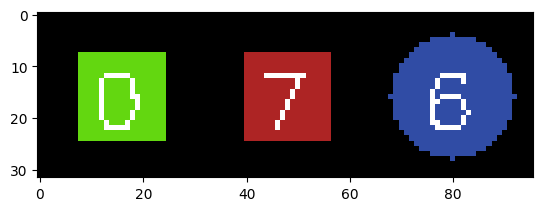

In [67]:
from core.model import MetaLearner
import torch
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/s3d")
from helchriss.dsl.dsl_types import BOOL

idx = 0
train_dataset = train_dataset.random_shuffle()
image = train_dataset[idx]['image']
query = train_dataset[idx]["query"]
program = train_dataset[idx]["program"]
answer = train_dataset[idx]["answer"]
plt.imshow(image.permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)

label_value = "rectangle"
expr = f'exists:Objects({label_value}:Objects(scene:Objects()))'
expr = f'{label_value}:Objects(scene:Objects())'


label_value1 = "red"
label_value2 = "circle"
relation = "right"
#print(f"exists {label_value1} at {relation} of {label_value2}")
#expr = f"exists:Objects({label_value1}:Objects({relation}:Objects({label_value2}:Objects(scene:Objects()),scene:Objects())))"


print(query)
print(program, expr)
print(answer)

print(learner.executor.evaluate(expr, grounding = {"image":image}).value[:,0] > 0)


#learner.execute_display("exists triangle", grounding = {"image":image}, tp = BOOL,  topK = 10)

In [11]:
for (entry, weight) in learner.maximal_parse("exists circle", tp = BOOL):print(entry, weight)

bigger:Integer(one:Integer(), two:Integer()) tensor(-2.2958, grad_fn=<UnbindBackward0>)
bigger:Integer(one:Integer(), one:Integer()) tensor(-2.6025, grad_fn=<UnbindBackward0>)
forall:Objects(scene:Objects()) tensor(-3.0494, grad_fn=<UnbindBackward0>)
smaller:Integer(three:Integer(), one:Integer()) tensor(-3.2084, grad_fn=<UnbindBackward0>)
smaller:Integer(one:Integer(), two:Integer()) tensor(-3.2224, grad_fn=<UnbindBackward0>)
exists:Objects(scene:Objects()) tensor(-3.2748, grad_fn=<UnbindBackward0>)
smaller:Integer(three:Integer(), two:Integer()) tensor(-3.4077, grad_fn=<UnbindBackward0>)
bigger:Integer(three:Integer(), two:Integer()) tensor(-3.4117, grad_fn=<UnbindBackward0>)
smaller:Integer(one:Integer(), one:Integer()) tensor(-3.4922, grad_fn=<UnbindBackward0>)
smaller:Integer(one:Integer(), one:Integer()) tensor(-3.5291, grad_fn=<UnbindBackward0>)
bigger:Integer(one:Integer(), three:Integer()) tensor(-3.6004, grad_fn=<UnbindBackward0>)
smaller:Integer(three:Integer(), one:Integer(

# Continual Learning Concepts
MetaLearner can continually learning new concepts using only language description of the new word and the related domain entries.

14 08:21:11 Filter dataset None: #before=1024, #after=1024.
14 08:21:11 Filter dataset None: #before=128, #after=128.


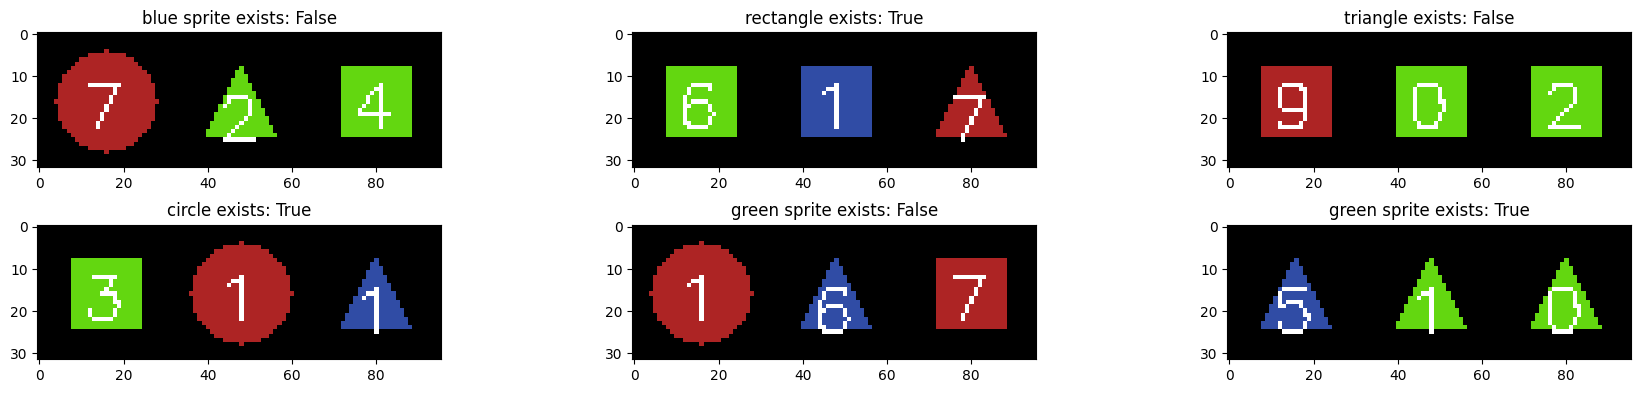

In [ ]:
### Continual Learning of New Concepts
import matplotlib.pyplot as plt
from datasets.mathprim.marked_integer_dataset import MixedSprites3Dataset

train_dataset = MixedSprites3Dataset(dataset_size=1024)  # create a dataset with 1024 samples
test_dataset = MixedSprites3Dataset(dataset_size=128)  # create a dataset with 128 samples for testing
corpus = [data[1]["query"] for data in train_dataset]

#from data.collect_corpus import write_vocab, load_corpus, build_vocab
#vocab = build_vocab([] + corpus)
##write_vocab(vocab)

train_arith_dataset = train_dataset.filter(lambda x : x["question_type"] in ['boolean', "arithmetic"])
test_arith_dataset = test_dataset.filter(lambda x : x["question_type"] in ['boolean', "arithmetic"])

plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_dataset[i]['image'].permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)
    plt.title(train_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()


In [8]:
from core.metaphors.types import *
from helchriss.dsl.dsl_types import FLOAT

if __name__ == "__main__":
    # 1. 定义初始类型和目标类型
    # 初始类型：List[Vector[float, 3]]
    initial_type = ListType(
        element_type=VectorType(elem_type=FLOAT, dim=3)
    )
    # 目标类型：List[Embedding["vec3", 3]]
    target_type = ListType(
        element_type=EmbeddingType(space_name="vec3", dim=3)
    )

    # 2. 定义转换规则：将Vector[float, d]转换为Embedding["vec3", d]
    # 模式：List[Vector[float, $d]]（$d是变量，匹配维度）
    rule_pattern = ListType(
        element_type=VectorType(elem_type=FLOAT, dim=PatternVar("$d"))  # $d匹配任意维度
    )
    # 转换函数：用绑定的$d生成Embedding
    def vec_to_embedding(bindings: Dict[str, TypeBase]) -> TypeBase:
        d = bindings["d"]  # $d绑定的是Vector的dim（int）
        return ListType(
            element_type=EmbeddingType(space_name="vec3", dim=d)
        )
    transform_rule = TransformRule(
        pattern=rule_pattern,
        transform_func=vec_to_embedding
    )

    # 3. 查找转换路径
    path = find_transform_path(
        initial_type=initial_type,
        target_type=target_type,
        rules=[transform_rule],
        max_depth=3
    )

    # 4. 输出结果
    if path:
        print(f"找到从 {initial_type} 到 {target_type} 的转换路径：")
        for i, (rule, bindings) in enumerate(path):
            print(f"步骤{i+1}：应用规则，变量绑定：")
            for var, typ in bindings.items():
                print(f"  ${var} = {typ}")
    else:
        print(f"无法从 {initial_type} 转换到 {target_type}")





AttributeError: module 'core.metaphors.types' has no attribute 'CasterRegistry'

In [ ]:
from helchriss.dsl.dsl_types import BOOL

initial_type = ListType(
        element_type=TupleType([EmbeddingType("set", 128), BOOL])
    )

target_type = ListType(
        element_type=TupleType([PatternVar("$d"), BOOL])
    )

matches = match_pattern(initial_type, target_type)

if matches is not None:
    for var in matches:print(var, matches[var])
else:print("No Match Found")